<a href="https://colab.research.google.com/github/PhiLNNT/Academic/blob/Subgradient-method-for-Convex-clustering-model/5_500_SubgradientMethodForConvexClusteringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUBGARDIENT METHOD FOR SOLVING CONVEX CLUSTERING PROBLEM: 500 POINTS - 5 BALANCED CLUSTERS**

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.colors as mcolors
from random import  uniform
from sklearn.datasets import make_blobs

# Objective function: $f(x)=g(x)+h(x)$ where
$g(x):=\dfrac{1}{2}\sum\limits_{i=1}^n\left\|x^i-a^i\right\|^2,  h(x):=\gamma\sum\limits_{i<j}\left\|x^i-x^j\right\|_p$

# Define subgradient algorithm function

In [ ]:
def Loss(x):
    g=np.linalg.norm(x-a)
    x_bar=np.tile(x.reshape((-1,d)),n)
    h=x_bar-np.transpose(x)
    h_l1=np.sum(h[h>=0])
    L=0.5*g**2+h_l1
    return L,h
def subgradient(x):
    t=np.array([])
    x = np.where(x==0, uniform(-1, 1),np.sign(x))
    for i in range(0,n+1):
        x[i-1,0:d*(i)]=0
        t=np.hstack((t,x[i-1,d*(i):d*n]))
    return K@t[n*d:]
def subgradient_descent(x,step_size=0.01,iter=100):
    lst_cost=[]
    lst_x=[]
    new_cost,h=Loss(x)
    lst_cost.append(new_cost)
    lst_x.append(x)
    for i in range(1,iter+1):

        v=mu*subgradient(h)+(x-a)

        if np.linalg.norm(v)<1e-8:
            lst_cost.append(new_cost)
            lst_x.append(x)
            print('Stopped by subgradient = 0 at ',i,'-th iterattion')
            return  lst_cost,lst_x,i

        if i <10:
            x=x-step_size*v/(np.linalg.norm(v)*(i))
            #x=x-step_size*v
            #x=x-step_size*v/(np.linalg.norm(v)*np.sqrt(i))

        else:
            #x=x-step_size*v/(np.linalg.norm(v)*np.sqrt(i))
            x=x-step_size*v/(np.linalg.norm(v)*np.log10(i))

        new_cost,h=Loss(x)

        if i%10==1:
            print('iter %d' %i + ' cost: %.6f' %new_cost)
            #print(v)

        if abs(new_cost-lst_cost[-1])<1e-20:
            lst_cost.append(new_cost)
            lst_x.append(x)
            print('Stopped by early stopping at ',i,'-th iterattion')
            return  lst_cost,lst_x,i
        lst_cost.append(new_cost)
        lst_x.append(x)
    print('Stopped by max iteration')
    return lst_cost,lst_x,i

# Run algorithm

## Initial data step

In [ ]:
n=500
d=2
mu=0.0007

In [ ]:
#Tạo các tâm và các bộ điểm
centers = [[0, 1], [1, 0], [0,0], [-1,0], [0,-1]]
stds = [0.13, 0.12, 0.15, 0.14, 0.11]
X, labels_true = make_blobs(n_samples=n, centers=centers, cluster_std=stds, random_state=0)
point_indices = np.arange(n)
Y=(np.transpose(X))
Y=np.split(Y,n,axis=1)
a=Y[0]
for i in range(1,n):
  a=np.vstack((a, Y[i]))
a=np.transpose(a)
a=a.ravel().tolist()
np.random.seed(2)
x=np.random.randint(1,10,(d*n))
print(x.shape)

(1000,)


In [ ]:
%%time
I=np.identity(d*n)
J=np.hsplit(I,n)
O=np.zeros((d*n, d*n))
O=np.hsplit(O,n)
for i in range(0,n-1):
    J[i]=np.tile(J[i],n-i-1)-np.delete(I, slice(0,(i+1)*d), axis=1)
K=J[0]
for i in range(1,n-1):
    K=np.hstack((K,J[i]))
print(K.shape)

(1000, 249500)
CPU times: user 1min 24s, sys: 2min 4s, total: 3min 29s
Wall time: 3min 28s


## General step

In [ ]:
%%time
lst_cost, lst_x,iter =subgradient_descent(x,step_size=0.2,iter=1000)

iter 1 cost: 756317.988726
iter 11 cost: 752908.089623
iter 21 cost: 745446.469644
iter 31 cost: 739108.914685
iter 41 cost: 733346.281525
iter 51 cost: 727951.756648
iter 61 cost: 722820.468661
iter 71 cost: 717890.386617
iter 81 cost: 713121.120861
iter 91 cost: 708484.576797
iter 101 cost: 703960.243750
iter 111 cost: 699532.583563
iter 121 cost: 695189.476094
iter 131 cost: 690921.240824
iter 141 cost: 686719.992942
iter 151 cost: 682579.203685
iter 161 cost: 678493.390723
iter 171 cost: 674457.894425
iter 181 cost: 670468.712365
iter 191 cost: 666522.374645
iter 201 cost: 662615.848191
iter 211 cost: 658746.462282
iter 221 cost: 654911.849721
iter 231 cost: 651109.899882
iter 241 cost: 647338.720665
iter 251 cost: 643596.607600
iter 261 cost: 639882.018299
iter 271 cost: 636193.551275
iter 281 cost: 632529.928229
iter 291 cost: 628889.979108
iter 301 cost: 625272.629450
iter 311 cost: 621676.889600
iter 321 cost: 618101.845409
iter 331 cost: 614546.650268
iter 341 cost: 611010.518

In [ ]:
print(len(lst_cost))
print(len(lst_x))
print('best iteration: ', lst_cost.index(min(lst_cost)))
print('best cost fuction: ',min(lst_cost))
#print('best object: ',lst_x[lst_cost.index(min(lst_cost))])
x=lst_x[lst_cost.index(min(lst_cost))]

1001
1001
best iteration:  1000
best cost fuction:  403341.4110408088


#**Graph**

[-0.8141104225658824, -0.01417940807043591, -0.005106766369574429, 0.8481478452936444, 1.1637438217722966, -0.08273390214599251, -0.21698020493450818, 0.12004469240100413, 1.2711170740829023, -0.005070858199277123, 0.12323785680746936, 0.000793896944904128, -0.3359406087992605, 0.060224858263543124, -0.044653589990733177, -0.9203194644643039, -0.9742504307923566, -0.053968566452585166, -0.9061201369564726, -0.09905079765148078, -1.007858622862826, -0.00019390598291340165, 0.11971164709150647, 1.0414345948825927, 0.2812206734064897, 1.1737486334267309, -1.0032792347030033, 0.1510872619357485, 1.0336530046379555, -0.11917483331154968, 0.9836860359186015, 0.13642696351232342, -0.0127988281753062, 0.9137478227729261, -0.9372526601807363, 0.23746542019594252, -0.180726182288367, -1.0446678975885815, 0.051480872646013885, 0.8579020038650342, 0.02014316534059912, 1.0491611275482826, -0.10444325634259935, 0.9103585288924739, 0.15080879069202335, -1.0560827566352327, 0.040092937416455615, -0.83

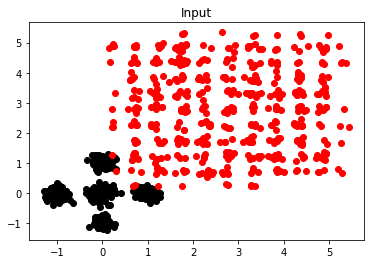

In [ ]:
x1=lst_x[lst_cost.index(min(lst_cost))]
odds = [a[n] for n in range(n*d) if n%2]
even = [a[n] for n in range(n*d) if n%2==0]
odds1 = [x1[n] for n in range(n*d) if n%2]
even1 = [x1[n] for n in range(n*d) if n%2==0]
print(a)
x1 = even
y1 = np.array(odds)
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");
x2 = even1
y2 = np.array(odds1)
plt.plot(x2, y2, 'o', color='red');

In [ ]:
%%time
lst_cost, lst_x,iter =subgradient_descent(x,step_size=0.2,iter=1000)

iter 1 cost: 402476.388325
iter 11 cost: 399202.059547
iter 21 cost: 392057.325576
iter 31 cost: 386017.298649
iter 41 cost: 380554.826556
iter 51 cost: 375471.468679
iter 61 cost: 370664.453695
iter 71 cost: 366071.893278
iter 81 cost: 361653.106870
iter 91 cost: 357379.333318
iter 101 cost: 353227.372264
iter 111 cost: 349179.351490
iter 121 cost: 345221.624072
iter 131 cost: 341342.603571
iter 141 cost: 337533.625083
iter 151 cost: 333786.797325
iter 161 cost: 330096.185286
iter 171 cost: 326456.566840
iter 181 cost: 322863.600937
iter 191 cost: 319313.786802
iter 201 cost: 315804.985970
iter 211 cost: 312335.187386
iter 221 cost: 308902.416665
iter 231 cost: 305505.927412
iter 241 cost: 302144.427776
iter 251 cost: 298817.374112
iter 261 cost: 295523.690279
iter 271 cost: 292262.402588
iter 281 cost: 289032.222161
iter 291 cost: 285832.472870
iter 301 cost: 282663.245730
iter 311 cost: 279524.304283
iter 321 cost: 276414.612748
iter 331 cost: 273334.578538
iter 341 cost: 270284.867

In [ ]:
print(len(lst_cost))
print(len(lst_x))
print('best iteration: ', lst_cost.index(min(lst_cost)))
print('best cost fuction: ',min(lst_cost))
#print('best object: ',lst_x[lst_cost.index(min(lst_cost))])
x=lst_x[lst_cost.index(min(lst_cost))]

1001
1001
best iteration:  1000
best cost fuction:  137202.85962015553


[-0.8141104225658824, -0.01417940807043591, -0.005106766369574429, 0.8481478452936444, 1.1637438217722966, -0.08273390214599251, -0.21698020493450818, 0.12004469240100413, 1.2711170740829023, -0.005070858199277123, 0.12323785680746936, 0.000793896944904128, -0.3359406087992605, 0.060224858263543124, -0.044653589990733177, -0.9203194644643039, -0.9742504307923566, -0.053968566452585166, -0.9061201369564726, -0.09905079765148078, -1.007858622862826, -0.00019390598291340165, 0.11971164709150647, 1.0414345948825927, 0.2812206734064897, 1.1737486334267309, -1.0032792347030033, 0.1510872619357485, 1.0336530046379555, -0.11917483331154968, 0.9836860359186015, 0.13642696351232342, -0.0127988281753062, 0.9137478227729261, -0.9372526601807363, 0.23746542019594252, -0.180726182288367, -1.0446678975885815, 0.051480872646013885, 0.8579020038650342, 0.02014316534059912, 1.0491611275482826, -0.10444325634259935, 0.9103585288924739, 0.15080879069202335, -1.0560827566352327, 0.040092937416455615, -0.83

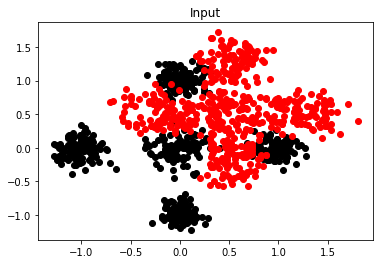

In [ ]:
x1=lst_x[lst_cost.index(min(lst_cost))]
odds = [a[n] for n in range(n*d) if n%2]
even = [a[n] for n in range(n*d) if n%2==0]
odds1 = [x1[n] for n in range(n*d) if n%2]
even1 = [x1[n] for n in range(n*d) if n%2==0]
print(a)
x1 = even
y1 = np.array(odds)
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");
x2 = even1
y2 = np.array(odds1)
plt.plot(x2, y2, 'o', color='red');

In [ ]:
%%time
lst_cost, lst_x,iter =subgradient_descent(x,step_size=0.2,iter=1000)

iter 1 cost: 136908.654017
iter 11 cost: 135804.750500
iter 21 cost: 133452.428908
iter 31 cost: 131534.638046
iter 41 cost: 129864.883162
iter 51 cost: 128379.822322
iter 61 cost: 127051.472457
iter 71 cost: 125854.002758
iter 81 cost: 124774.679555
iter 91 cost: 123800.726404
iter 101 cost: 122916.592491
iter 111 cost: 122103.682366
iter 121 cost: 121341.636689
iter 131 cost: 120636.143197
iter 141 cost: 120058.835436
iter 151 cost: 119614.152983
iter 161 cost: 119375.958726
iter 171 cost: 119272.848373
iter 181 cost: 119227.958752
iter 191 cost: 119203.376958
iter 201 cost: 119189.478851
iter 211 cost: 119182.702833
iter 221 cost: 119177.638290
iter 231 cost: 119174.312666
iter 241 cost: 119171.582075
iter 251 cost: 119169.579298
iter 261 cost: 119167.526313
iter 271 cost: 119166.056867
iter 281 cost: 119164.315681
iter 291 cost: 119162.380024
iter 301 cost: 119160.769362
iter 311 cost: 119159.685784
iter 321 cost: 119158.582780
iter 331 cost: 119156.769399
iter 341 cost: 119155.734

In [ ]:
print(len(lst_cost))
print(len(lst_x))
print('best iteration: ', lst_cost.index(min(lst_cost)))
print('best cost fuction: ',min(lst_cost))
#print('best object: ',lst_x[lst_cost.index(min(lst_cost))])
x=lst_x[lst_cost.index(min(lst_cost))]

1001
1001
best iteration:  998
best cost fuction:  119117.04976244073


[-0.8141104225658824, -0.01417940807043591, -0.005106766369574429, 0.8481478452936444, 1.1637438217722966, -0.08273390214599251, -0.21698020493450818, 0.12004469240100413, 1.2711170740829023, -0.005070858199277123, 0.12323785680746936, 0.000793896944904128, -0.3359406087992605, 0.060224858263543124, -0.044653589990733177, -0.9203194644643039, -0.9742504307923566, -0.053968566452585166, -0.9061201369564726, -0.09905079765148078, -1.007858622862826, -0.00019390598291340165, 0.11971164709150647, 1.0414345948825927, 0.2812206734064897, 1.1737486334267309, -1.0032792347030033, 0.1510872619357485, 1.0336530046379555, -0.11917483331154968, 0.9836860359186015, 0.13642696351232342, -0.0127988281753062, 0.9137478227729261, -0.9372526601807363, 0.23746542019594252, -0.180726182288367, -1.0446678975885815, 0.051480872646013885, 0.8579020038650342, 0.02014316534059912, 1.0491611275482826, -0.10444325634259935, 0.9103585288924739, 0.15080879069202335, -1.0560827566352327, 0.040092937416455615, -0.83

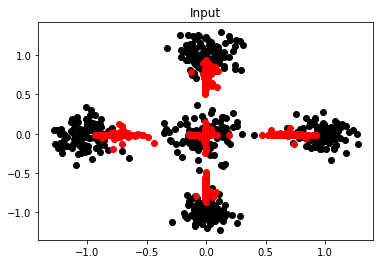

In [ ]:
x1=lst_x[lst_cost.index(min(lst_cost))]
odds = [a[n] for n in range(n*d) if n%2]
even = [a[n] for n in range(n*d) if n%2==0]
odds1 = [x1[n] for n in range(n*d) if n%2]
even1 = [x1[n] for n in range(n*d) if n%2==0]
print(a)
x1 = even
y1 = np.array(odds)
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");
x2 = even1
y2 = np.array(odds1)
plt.plot(x2, y2, 'o', color='red');

# **Result**

949
500


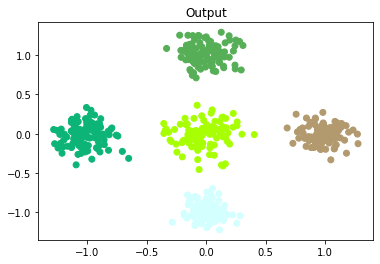

In [ ]:
colors=mcolors.XKCD_COLORS
colors= list(colors.keys())
print(len(colors))
y =[i for i in range(n)]
print(len(y))
color_map =  dict()
for i in range(len(y)):
    color_map[i]=colors[1*i]
#print(color_map)
y_color =[ color_map[i] for i in y]
#fig = plt.figure(figsize=(7, 10))
# Adds a subplot at the 1st position
#fig.add_subplot(2, 1, 1)
#plt.scatter(x1, y1, c=y_color)
#plt.title("Input");
w=np.split(lst_x[lst_cost.index(min(lst_cost))],n)
for i in range(n):
    for j in range(n):
        dis = np.linalg.norm(w[i]-w[j])
        if dis<1.4e-1:
            y[j]=y[i]
y_color =[color_map[i] for i in y]
#fig.add_subplot(2, 1, 2)
plt.scatter(x1, y1,c=y_color)
plt.title("Output");

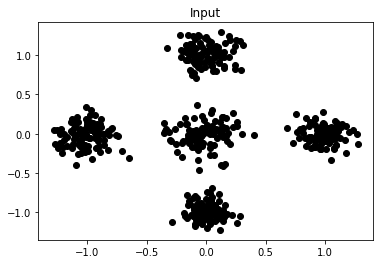

In [ ]:
plt.plot(x1, y1, 'o', color='black');
plt.title("Input");

<ipython-input-66-af2ce89e4717>:1: RuntimeWarning: invalid value encountered in log10
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
<ipython-input-66-af2ce89e4717>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')


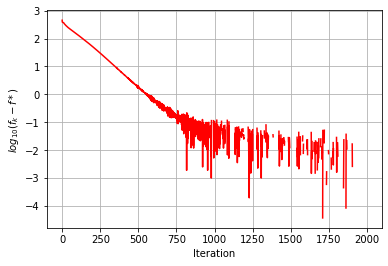

In [ ]:
plt.plot([i for i in range(iter)],[np.log10(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='red')
plt.xlabel('Iteration')
plt.ylabel('$log_{10}(f_k-f*)$')
plt.grid(True)

<ipython-input-67-b3b1462df41d>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([i for i in range(iter)],[(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='yellow')


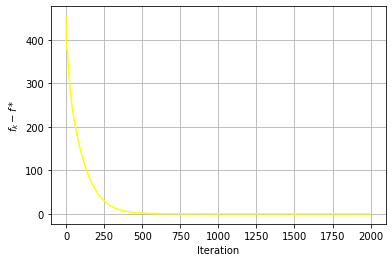

In [ ]:
plt.plot([i for i in range(iter)],[(i-lst_cost[-1]) for i in lst_cost[:-1]],'b',color='yellow')
plt.xlabel('Iteration')
plt.ylabel('$f_k-f*$')
plt.grid(True)

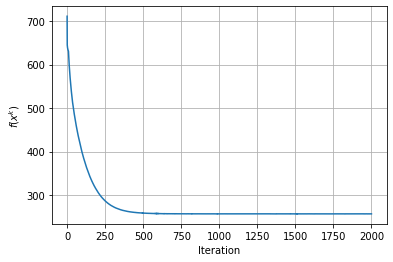

In [ ]:
plt.plot([i for i in range(iter+1)],np.array(lst_cost))
plt.xlabel('Iteration')
plt.ylabel('$f(x^k)$')
plt.grid(True)